# Dynamically modelling the Prey-Predator Antagonistic Relationship

By EYY (Ellie, Yi Zhen, Yu Fei)

## Introduction

Population ecology models are useful to quantitatively represent dynamic changes in the abundance and distribution of a population over time [<sup>1</sup>](#fn1).When constructing population ecology models, discrete-time models where change happens at a certain point in time are preferred over continuous-time models because discrete-time models can produce more reliable predictions [<sup>2</sup>](#fn2).

In our project, we will be looking specifically at the Lotka-Volterra Model which is a simple discrete-time model.

## **Deterministic Lotka-Volterra Model**

The Lotka-Volterra Model demonstrates one of the most fundamental interaction in an ecosystem – a predator-prey relationship between a single prey and predator. Its most fundamental plot with its cyclical oscillations demonstrate the co-dependence in the changes of population sizes of prey and predator that achieve a dynamic equilibrium over time due to a feedback loop mechanism.

We will be using a deterministic model since it produces exact population numbers and data points in this discrete-time stimulation from our input parameters. This will help us understand the exact relationships between the inputs and its processor (ordinary differential equations) in the Lotka-Volterra Model.

### Signifiance of the Lotka-Volterra Model

This model is crucial in ecological studies to study a particular prey-predator pair or network. Divergence from the stable and persistent coexistence can provide crucial insights into a potentially changing natural environment. For instance, large catastrophic disruption (described later in our notebook), or when there are changing selection pressures and survival/reproductive fitness of the species.

The Lotka-Volterra Model stimulating the dynamics of the prey-predator antagonistic qualities are not necessarily restricted to ecological settings. 
The "predator" and "prey" can refer figuratively to adversaries in general competitive scenarios, such as economics, finance, politics and radioactivity, games, etc. Within the sphere of biology, some instances of where the model can also be applied includes measuring the relationship between an ecosystem and long term chronic radiation exposure [<sup>3</sup>](#fn3) and population genetics, mathematical ecology and prebiotic evolution [<sup>4</sup>](#fn4).

##### Description of parameters

These are the definitons of the parameters used in our code:

* x = `population_of_prey` = initial relative proportion of prey populaiton 
* y = `populaiton_of_predator` = initial relative proportion of predator population
* a = `prey_growth_rate` = Natural growth rate of prey, without predator
* b = `prey_predation_rate` = Natural death rate of prey due to predation
* c = `predator_death_rate` = Natural death rate of predator, without prey 
* e = `predation_efficacy` = Rate at which predated prey leads into the creation of a predator

Note that the values used for `prey_growth_rate`, `prey_predation_rate`, `predator_death_rate`, `predation_efficacy` in our models are arbitary values and will be used as default values. We will mainly be examining how changing these parameters will affect the model.

##### Equations used

The original equations of the Lotka-Volterra Model are first order, ordinary, non-linear differential equations that describe the rate of change of prey population (x) and the rate of change of predator population (y) over time:
$$
\dfrac{dx}{dt}= ax-bxy
$$
$$
\dfrac{dy}{dt}= -cy +exy
$$

The first equation (dx/dt) can be interpreted as the rate of natural change in the prey population due to natural growth rates, subtracting for the rate of predation.

We assume that there is no other strong selection pressure on the prey species that is limiting their reproductive success, except predation. Hence, the exponential growth of prey population (in the absence of predation) [<sup>5</sup>](#fn1) is represented by ax. 
Since we assume that the rate of predation is proportional to the rate at which predator and prey meet, we represent it by bxy.

The second equation (dy/dt) can be interpreted as the rate of change in predator population depending on its rate of prey consumption and efficacy at which consumed prey are converted to a predator, by subtracting for its intrinsic death rate.

exy represents the growth rate of predator due to consumption (considering predation rate and prey-to-predator conversion efficacy). Meanwhie, -cy represents the decrease in predator. due to natural death rate. We assume that there is a natural exponential decay without prey consumption, and predators are specialists that only consume one specific prey species [<sup>5</sup>](#fn1).

By performing the forward Euler’s method, we can derive the following equations to determine the relative population numbers of prey/predators at each time point, where d𝑡 is the timestep:

$$
x (t + d𝑡) = x(t) + (ax(t)-bx(t)y(t))d𝑡
$$
$$
y (t + d𝑡) = y(t) + (-cy(t) + dex(t)y(t))d𝑡
$$

Note: With a smaller dt value, there will be reduced discrepancy and rounding error present in the model. This is important because if the discrepancy is large enough, the population could diverge from its stable dynamic equilibrium (seen below) of a cyclical system. In such case, the model is no longer representative of the prey/predator population.

Some asssumptions made in the model:

* Our model represents a closed system with no external influences that affects the population sizes of either the prey or predator.

*  The population sizes within each species has reached an equilibrium so there will be no net changes in population numbers within each species caused by other signifiance selection pressures such as internal competition for limited resources that would otherwise alter their survival rates [<sup>6</sup>](#fn1).

*   The availability of prey for predator population, and predation for prey population are the only signifiant changing selection pressure affecting each of their survival and growth rate.

*   Prey consumption rate by predator, and rate at which the consumed prey are converted to new predators is directly proportional to the prey abundance [<sup>5</sup>](#fn1).

*   Both prey and predator populations are unstructured (e.g. based on their age, sex, size etc.) [<sup>5</sup>](#fn1).

*   The initial parameters used in the model does not change in the period of time of a stimulation.


By stimulating this model in a code, we would be able to estimate and predict future trajectories in population numbers in both species, at equilibrium or with specific adjustments in parameters due to internal/external changes to occur over evolutionary time.

##### Code

In [1]:
#importing packages

from matplotlib import pyplot as plt
import numpy as np

First, we need to generate a list of values from the Lotka-Volterra equations to get the (relative) population numbers of the predator and prey of interest over time. We created a function to do that.

In [2]:
#function to generate lists
def lotka_volterra_lists(population_of_prey, population_of_predator, max_time=100
                         ,prey_growth_rate=0.7,prey_predation_rate = 0.5,
                         predator_death_rate = 0.2,predation_efficacy = 0.3,dt=0.1,
                         human_disruption=False,prey_survival_rate=0.3,predator_survival_rate=0.3):
    '''
    Generating lists for the Lotka-Volterra model
    '''
    # initial time and time step
    t = 0
    # empty lists to store time and populations
    t_list = []
    population_of_prey_list = []
    population_of_predator_list = []

    # initialize lists
    t_list.append(t)
    population_of_prey_list.append(population_of_prey)
    population_of_predator_list.append(population_of_predator)

    while t < max_time:
    # calc new values for t, prey population, predator population
        t = t + dt
        #for a little cool graphing later on
        if human_disruption and t>50:
            population_of_prey = prey_survival_rate * population_of_prey
            population_of_predator = predator_survival_rate * population_of_predator
            human_disruption = False
        #applying the Lotka-Volterra equations
        delta_prey = prey_growth_rate * population_of_prey
        delta_prey -= prey_predation_rate * population_of_prey * population_of_predator
        delta_prey *= dt
        population_of_prey += delta_prey

        population_of_predator += (-predator_death_rate*population_of_predator + predation_efficacy*
                                   prey_predation_rate*population_of_prey*population_of_predator)*dt

        # store new values in lists
        t_list.append(t)
        population_of_prey_list.append(population_of_prey)
        population_of_predator_list.append(population_of_predator)
    
    return t_list, population_of_prey_list, population_of_predator_list

Next is for a function for plotting! Since deterministic Lotka-Volterra graphs always have 2 graphs (one for prey population and the other predator) we accounted for this in our plotting function.

The function also accounts for two situations: if an axis is not defined (aka we only want to plot one graph) then `ax=None` (default) and the function will plot a graph for us directly. Otherwise if an axis is specified (eg `ax=ax1`) the function will help do all the legwork to plug in the values and we will define the fig and ax on our part.

In [3]:
def lotka_volterra_plotting(x,y_1,y_2,title,xlabel='time',ylabel='relative population size',color_1='red',
                            color_2='blue',label_1='prey',label_2='predator',marker='.',ax=None):
    '''
    Generating graphs for the Lotka-Volterra Model
    ''' 
    if ax==None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
        ax.plot(x,y_1,color=color_1,label=label_1,marker=marker)
        ax.plot(x,y_2,color=color_2,label=label_2,marker=marker)
        ax.set_xlabel(xlabel, size=12)
        ax.set_ylabel(ylabel, size=12)
        ax.set_title(title, size=15)
        ax.legend(loc = 'upper left')
    else:
        ax.plot(x,y_1,color=color_1,label=label_1,marker=marker)
        ax.plot(x,y_2,color=color_2,label=label_2,marker=marker)
        ax.set_xlabel(xlabel, size=12)
        ax.set_ylabel(ylabel, size=12)
        ax.set_title(title, size=14)
        ax.legend(loc = 'upper left')

##### Plotting a simple graph the functions

To visualise the model, let us generate a list of values with the initial population of prey being `1.0` and that of the predator being `0.5`.

In [4]:
time, prey, predator = lotka_volterra_lists(1.0,0.5)

Using the lists generated from our `lotka_volterra_lists` function, we can then plop them into our plotting function `lotka_volterra_plotting`.

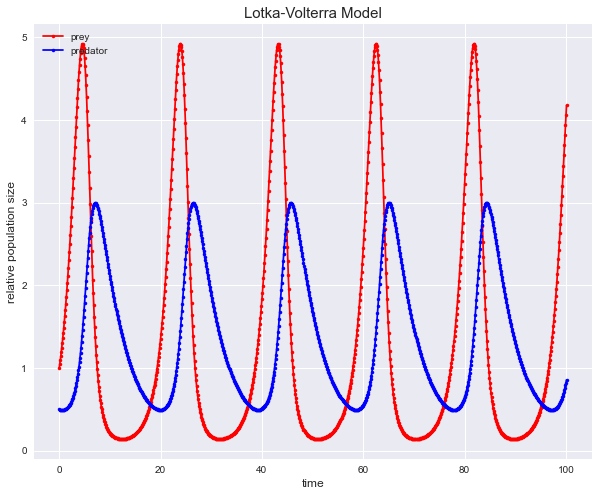

In [5]:
plt.style.use("seaborn")
lotka_volterra_plotting(time,prey,predator,'Lotka-Volterra Model')

Each of the marker points shows the discrete time points where the population number is tabulated. The markers are very close together because the value of `dt` is small at `0.1`.

Here, we see the relative population size of prey and predators changing cyclically --- a unique pattern of alternate oscillations with a consistent frequency. This reflects the functional and numerical response of the predator to prey numbers and vice versa. 

Such a graph is observed because the predator’s feeding is limited only by the amount of prey in the environment, given internal resource competition in the predator population [<sup>5</sup>](#fn1). Likewise, the prey’s survival is limited only by predation from this one species. Hence, we see an interdependence between the two species on survival and reproductive fitness and success. Therefore, the population numbers of prey is counter-balanced by predators numbers and vice versa.

The prey also reproduces at a faster rate than predators, hence, we see a higher amplitude of increase in the prey numbers than predator numbers at each oscillation. (This is often observed in the wild with lower relative birth rate of the predator than prey).

## **Deterministic Lotka-Volterra Model with changing initial parameters: Initial relative population size (`population_of_prey, population_of_predator`)**

The natural environment is widely diverse. 

Let's say there is a new immigration to the habitat involving a new prey species with a small initial population size (founder effect), that takes up a unique niche in the ecosystem. This new prey species may have a new interaction with a predator species already present in the ecosystem, hence, present in greater numbers. Eventually, this prey-predator relationship may be strengthened such that the predator becomes solely reliant on this new prey population for food. 

So what happens if the initial population of the predator is large than the prey? Will our model still hold?

In our original model, initial relative population size of preys (`1.0`) is the 2x that of the relative population size of predators (`0.5`). (refer to plot on the left)

However, now let's make the intial relative population size of predators `1.0`, 2x the relative population size of preys at `0.5`. (refer to plot on the right)

In [6]:
#generating lists where the initial relative population of predator is greater than prey
time_2, prey_2, predator_2 = lotka_volterra_lists(0.5,1.0)

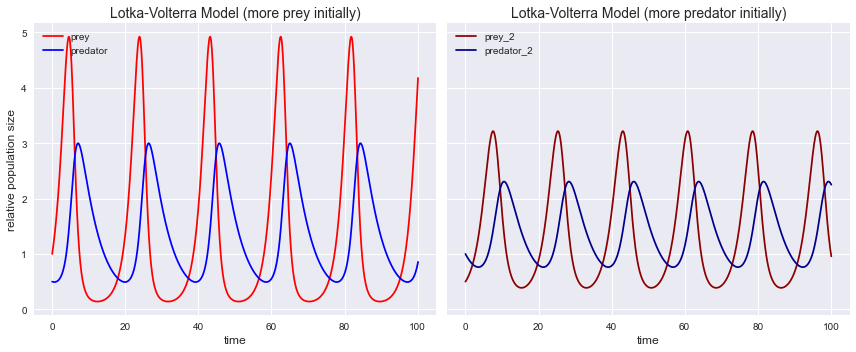

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 5),sharey=True)
ax1, ax2 = ax.ravel()

lotka_volterra_plotting(time,prey,predator,'Lotka-Volterra Model (more prey initially)',marker='',ax=ax1)

lotka_volterra_plotting(time_2,prey_2,predator_2,'Lotka-Volterra Model (more predator initially)',ylabel='',marker='',
                        color_1='darkred',color_2='darkblue',label_1='prey_2',label_2='predator_2',ax=ax2)


plt.tight_layout()
plt.show()

What we observe is that there's not much of a difference to the general trend! The oscillating pattern stays constant at the same frequency. Only the relative amplitude of relative population sizes are slightly altered between the prey and predator. 

Even when the predator proportion is set the be higher than the prey initially, as time passes, the prey still reach a much higher relative population size than the predator. This is because the growth rate of prey population are typically greater than that of predators.

What is to be noted is that the relative difference in amplitude/maximum relative population size reached between preys and predators over time is lower when the intial predator population is higher. This is because the higher predator population puts a greater selection pressure on the prey population, which greatly limits the extent to which the prey population can increase. However, as a result, predator population also cannot increase as much as before (when initial prey population is greater) because there is much less food abundance, limiting the predator growth rate.

## **Deterministic Lotka-Volterra Model with changing initial parameters: Predation rate (`prey_predation_rate`)**

To take a deeper look into this relationship in nature, we assume that the essential characteristics of the prey and predator species (i.e. natural growth of prey without predation, natural death rate of  predator without influence from prey, and rate at which consumed prey is converted to a new predator) stays constant.

Here, we stimulate how the population dynamics would be affected by increasing the predation rate of prey to `0.6`. For instance, in a different environmental landscape, predators may be able to more efficiently spot, hunt and catch prey.

One particular real-life example is the unique case of the locust (predator) that rapidly increases predation rate of crops (prey) after coming out of hibernation (there still exists basal levels of predation during hibernation periods) [<sup>7</sup>](#fn7) every 13 or 17 years or so. So how is the population dynamics of the crop and locust affected with this higher predation rate?

Note: default `prey_predation_rate=0.5`

In [8]:
#generating a new list of values
time_3, prey_3, predator_3 = lotka_volterra_lists(0.5,1.0,prey_predation_rate = 0.6)

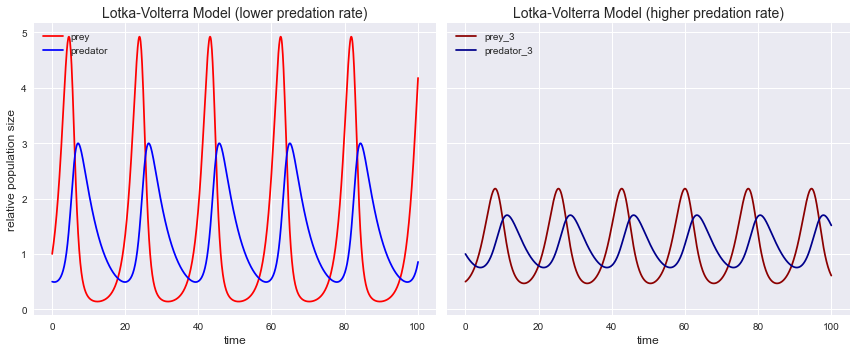

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 5),sharey=True)
ax1, ax2 = ax.ravel()

lotka_volterra_plotting(time,prey,predator,'Lotka-Volterra Model (lower predation rate)',marker='',ax=ax1)

lotka_volterra_plotting(time_3,prey_3,predator_3,'Lotka-Volterra Model (higher predation rate)',ylabel='',marker='',
                        color_1='darkred',color_2='darkblue',label_1='prey_3',label_2='predator_3',ax=ax2)


plt.tight_layout()
plt.show()

Here, the oscillating pattern is still present! However, what we observe is that when `prey_predation_rate` is raised by just `0.1` to `0.6`, we see a drastic fall in the relative population sizes of both the predator and prey, hence, the amplitude of the oscillations of both prey and predator populations.

Here, similar to the case where we changed the inital population sizes of the prey and predator in the previous plots, the higher predation rate causes puts a greater selection pressure on the prey population, limiting its survival rate and increasing death rate. The lower increase in prey population also reduces the food abundancy for predators, hence, simiarly, limiting their reproductive rates, and the extent to which predator population can increase.

Referring back to our locust (predator) and prey (crop) example, both population sizes would decrease with this greater predation rates of locust. Hence, our stimulation could predict potential socio-economic problems of a lower crop yield if locust predation is not managed.

## **Deterministic Phase Space Plot of a Prey-Predator Relationship in a Lotka-Volterra Model**

How about we take a different perspective to this prey-predator relationship?

A phase space plot is a parametric graph used to analyse complex oscillation patterns.
Each point represents a potential state (relative population profile, with specific momentum variables) at a particular point in time. The overall phase plot, hence, represents all the possible states of a population dynamic in a prey-predator system as a function of time.

In a phase space plot, we would be providing a different way of visualising the changing relationship between prey and predators. Here, we would be plotting the relative population size of predators against that of prey. 

A phase space plot is significant because it provides us with crucial insights into the changing relationship between a prey and its predator in the context of additional catastrophic factors like removing a significant portion of the population or prey refuge (prey refuge not described in our notebook) [<sup>8</sup>](#fn8). Complex phase space plots can even model implications on Lotka-Volterra systems with small-scaled external environmental influences, such as changing weather conditions [<sup>9</sup>](#fn9).

Since the phase space plot only takes in two parameters (namely `prey` and `predator` which are the lists from our `lotka_volterra_lists` function denoting the relative population sizes of prey and predator) we need a new function to plot phase space plots!

##### Code

In [10]:
def phase_space_plotting(x,y,title,color='red',marker='.',linewidth=1,xlabel='relative prey population size',
                         ylabel='relative predator population size',label='',ax=None):
    '''
    To plot a phase space graph
    '''
    if ax==None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
        ax.plot(x,y,color=color,marker=marker,linewidth=linewidth,label=label)
        ax.set_xlabel(xlabel, size=12)
        ax.set_ylabel(ylabel, size=12)
        ax.set_title(title, size=15)
    else:
        ax.plot(x,y,color=color,marker=marker,linewidth=linewidth,label=label)
        ax.set_xlabel(xlabel, size=12)
        ax.set_ylabel(ylabel, size=12)
        ax.set_title(title, size=15)

##### Plotting

We used the same values from `lotka_volterra_lists(1.0,0.5)` and take a look at what we got...

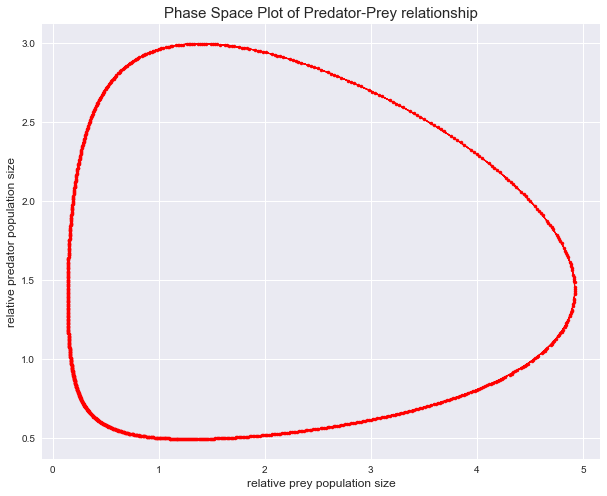

In [11]:
phase_space_plotting(prey,predator,'Phase Space Plot of Predator-Prey relationship')

This plot is read in an anti-clockwise direction, showing the trajectory of the changing relationship over time. So starting from the bottom left point, as both population of prey and predator is low, the prey population is faced with little predation pressure, hence, rapidly increases in numbers. The width of the phase plot hence, represents the amplitude or maximum prey population size that can be reached. Predator numbers still remain low at the start, given limited food availability. 

However as prey population increases, the predator population rises due to easing pressures of food scarcity. Increase predator numbers means increasing predation, and increasing pressure on prey population. Prey population, simultaneously, reduces. Hence, the graph begins to curve towards the left side. Here, the height represents the amplitude or maximum predator population size that can be reached.

As prey population decreases to nearly zero, the predator population plummets too with shrinking food supply! Thus, the cycle starts again. This forms a closed loop, hence, representing the dynamic stability of the changing population sizes. 

At the center of the space phase plot will be the equilibrium point of relative prey and predator population sizes.

We see that the alternating population sizes of the prey and predator population is due to the alternating degrees of selection pressure on each of the species, with food scarcity (prey population numbers) as the pressure on predators and predation (predator population numbers) as the pressure on preys.

## **Deterministic Phase Space Plot of Lotka-Volterra Model with changing initial parameters: Initial relative population size (`population_of_prey, population_of_predator`)**

Here, just like the previous Lotka-Volterra model, we would be changing the initial population sizes of prey and predators (i.e. larger initial population size of predators than prey) to determine how the relationship between prey and predators changes. 

In our original model, initial relative population size of preys (`1.0`) is the 2x that of the relative population size of predators (`0.5`). (Refer to plot on the left)

However, now we make the intial relative population size of predators `1.0`, 2x the relative population size of preys at `0.5`. (Refer to plot on the right)

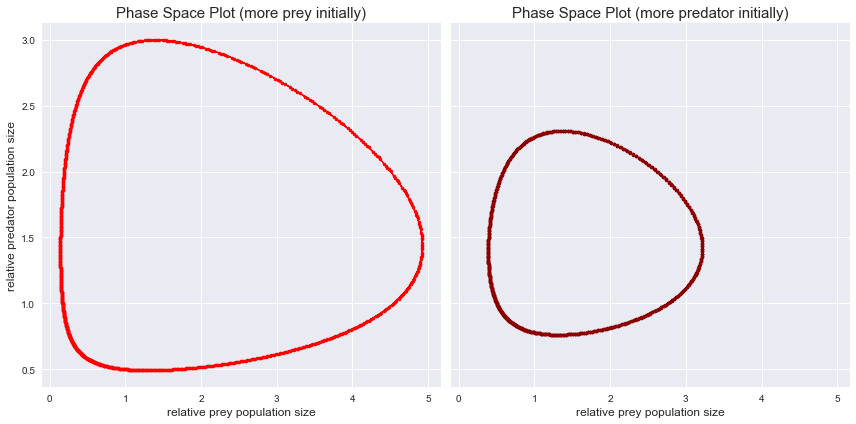

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 6),sharey=True,sharex=True)
ax1, ax2 = ax.ravel()

phase_space_plotting(prey,predator,'Phase Space Plot (more prey initially)',ax=ax1)

phase_space_plotting(prey_2,predator_2,'Phase Space Plot (more predator initially)',color='darkred',ylabel='',ax=ax2)

plt.tight_layout()
plt.show()

Referring back to our deterministic lotka-volterra model where we changed initial relative population size, we see that the cyclical oscillation pattern remains. Hence, the shape of the phase space plot stays the same.

Starting from the bottom right left point of the plot, (in the plot on the right) we see that there greater inital population size of predator than prey (as opposed to graph on the left). The prey population will still increase more than the predator population since the growth rate of the prey is typically greater than that of predators. Hence, the width of the plot is still greater than its height. 

However, reading the plot in the anticlockwise direction, the increase in prey population in the right plot is less than that in the left plot (as seen from the smaller width in phase space plot on the right). This is because the greater initial predator population puts a greater selection pressure on the prey population, which greatly limits the survival rate and the extent to which the prey population can increase. At this point the predator population size still remain low due to food scarcity. This is represented with the smaller width of the phase plot on the right, as compared to the plot on the left.

Continuing on in the anticlockise direction, with increasing prey population, there is increase food supply to ease the selection pressure of food scarcity on the predator population. However, the increase in predator population in the plot on the right is also less than that in the left plot (as seen from the smaller height of the phase space plot on the right). This is because there is lower increase in prey population, hence less food abundance, which limits their reproduction rate as well. This is represented with the smaller height of the phase space plot on the right, as compared to the plot on the left.

Overall, we see a smaller phase space plot on the right with greater initial predator population than that on the left.

## **Deterministic Phase Space Plot of Lotka Volterra Model with changing intial parameters: Predation Rate (`prey_predation_rate`)**

Here, just like the previous Lotka-Volterra model, we would be increasing the predation rate of preys to `0.6`, so as to determine how the relationship between prey and predators changes. 

Note: default `prey_predation_rate=0.5`

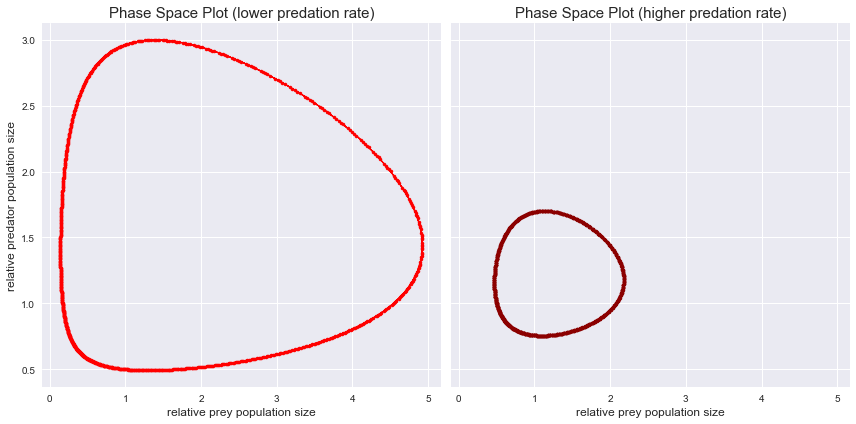

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 6),sharey=True,sharex=True)
ax1, ax2 = ax.ravel()

phase_space_plotting(prey,predator,'Phase Space Plot (lower predation rate)',ax=ax1)

phase_space_plotting(prey_3,predator_3,'Phase Space Plot (higher predation rate)',color='darkred',ylabel='',ax=ax2)

plt.tight_layout()
plt.show()

Referring back to our deterministic lotka-volterra model where we changed initial predation rate of prey, we see that the cyclical oscillation pattern remains. Hence, the shape of the phase space plot stays the same.

Starting from the bottom right left point of the plot, reading the plot in the anticlockwise direction, the increase in prey population in the right plot is less than that in the left plot (as seen from the smaller width in phase space plot on the right). This is because the higher predation rate (similar to the previous stimulation of a greater initial predator population) puts a greater selection pressure on the prey population, which greatly limits the survival rate/increases death rate, and the extent to which the prey population can increase. At this point the predator population size still remain low due to food scarcity.

Continuing on in the anticlockise direction, with increasing prey population, there is increase food supply to ease the selection pressure of food scarcity on the predator population. However, the increase in predator population in the plot on the right is also less than that in the left plot (as seen from the smaller height of the phase space plot on the right). This is because there is lower increase in prey population, hence less food abundance, which limits their reproduction rate as well.

Overall, we see a smaller phase space plot on the right with greater initial predator population than that on the left.

## **Deterministic Lotka Volterra Model in a Disruptive Environment**

However, the natural environment is ever-changing. There are multiple external influences (e.g. human activities, periodic natural catastrophes over evolutionary history) that could lead to significant disruptions in the population numbers of both prey and predators, directly or indirectly.
So what would happens if  a certain percentage of both populations are killed off? Would the cyclical dynamic be maintains? What would happen to its relative population sizes between the 2 species?

Using the same initial parameters as the normal Lotka Volterra Model plotted above, we would decrease both the population size by 70% (let's assume due to human actions that destroys natural habitats of the prey/predator) at t = 50.

This is when we'll be calling in that `human_disruption` line of code!


```
if human_disruption and t>50:
            population_of_prey = prey_survival_rate * population_of_prey
            population_of_predator = predator_survival_rate * population_of_predator
            human_disruption = False
```
Note: default `prey_survival_rate` and `predator_survival_rate` is `0.3`.

Let's see what happens when we activate this part of the code!


In [14]:
time_4, prey_4, predator_4 = lotka_volterra_lists(1.0,0.5,human_disruption=True)

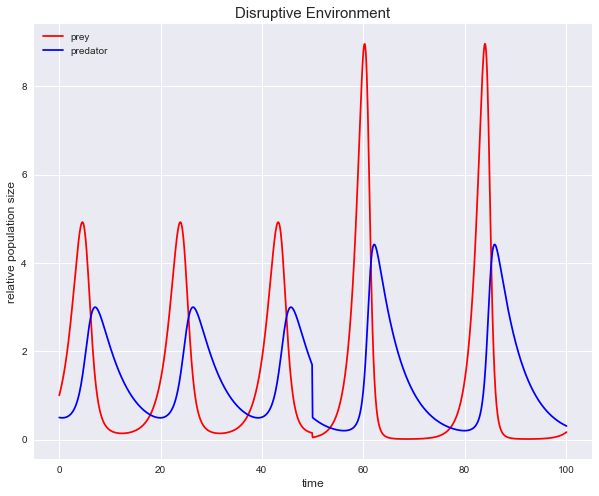

In [15]:
# Plot the results    
lotka_volterra_plotting(time_4, prey_4, predator_4,'Disruptive Environment',marker='')

So, we can see that after the once-off disruption at t = 50, the cyclical nature of the relationship remains. The frequency of oscillating population sizes in both the prey and predator also stays the same. However, the amplitude of population sizes in prey and predator both increases, with a much greater increase in the prey population. This recovery occurs specifically after a sudden dip in the relative population size of the predator and prey at t= 50. What happens here is known as a rebound effect where the population size of the prey escapes the “control” of the predator numbers [<sup>10</sup>](#fn10) [<sup>11</sup>](#fn11) [<sup>12</sup>](#fn12). With the sudden reduction in predators, the selection pressure of predation previously placed on prey numbers is greatly alleviated. Hence, the prey population increases rapidly within this brief relief. With the large, exponential growth rate of prey species, we see a large increase in prey population size (even greater than the maximum population size of prey reached before the disruption), before predator "catches up" to the prey's growth to limit further increase with an increase in predation. The predator population takes time to catch up with the growth in prey population. Even with a much greater increase in abundance of food supply, the growth rate of predator is significantly lower. This is likely because prey tend to have much higher reproduction rates than predators. For instance, rabbits (prey) can reproduce up to 12 times a year and on average have 6 young each time. However, a fox (predator) usually reproduce only once a year and have on average 4-5 pups.

Interestingly, we see that a disruption in population (i.e. an initial once-off reduction in population sizes of both prey and predators) will eventually lead to a much larger population size of both prey and predator at a new dynamic equilibrium.

Additionally, this disruption spotlights the difference in growth rate of the prey and predator population as seen in the amplified difference in maximum population size prey/predator reaches within the system. 

One unique example is the 2004 Tsunami that affected the Nicobar island that caused a significant decrease to both *syzygium spp.* (prey) and pink-necked green pigeon (predator) population [<sup>13</sup>](#fn13). For conservationists, our stimulation can help them predict that the population sizes of both these species will rebound back to a healthy level, even greater than its initial maximum population size. However, this is assuming that the habitat of these species are protected and no other selection pressures exists on these 2 species to limit their population growth in the environment after the tsunami. Hence, conservation efforts should be focused on environmental restoration.

### **Modifications**

Now, what if there was selective disruption on the prey/predator population.

What if we only kill off 70% of the prey population? (refer to middle graph)

One particular example this could apply to the shallow-water Caribbean elkhorn coral population, *Acropora palmata*. The population size of this prey decreases with the spread of white pox, a lethal disease [<sup>14</sup>](#fn14). Loss of living cover of this species in Florida Keys typically exceed 70% of the initial population. This could potentially affect its natural predator, a coral-eating flatworm, *Prosthiostomum acroporae* [<sup>7</sup>](#fn7). So how would the population dynamics of the coral and flatworm change with this sudden drastic decrease in prey population size of corals?

What if we kill off more prey population (90%) than predators (70%)? (refer to rightmost graph)

Continuing on from the *syzygium spp.* (prey) and pink-necked green pigeon (predator) population example, let's say, hypothetically, that the tsunami did not affect both species equally, and more *syzygium spp.* population are killed off due to their lack of mobility to escape the affected areas. So, how will the population dynamics of the *syzygium spp.* and pigeon population respond to this disruption?

In [16]:
#killing off 70% of the prey population only
time_5, prey_5, predator_5 = lotka_volterra_lists(1.0,0.5,human_disruption=True,predator_survival_rate=1)

#killing off 90% of prey population and 70% predator population
time_6, prey_6, predator_6 = lotka_volterra_lists(1.0,0.5,human_disruption=True,prey_survival_rate=0.1)

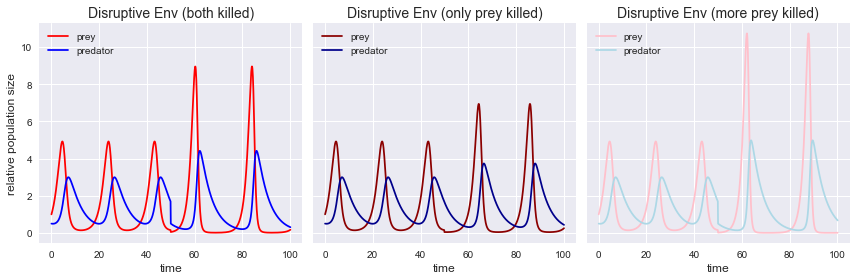

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(12, 4),sharey=True,sharex=True)
ax1, ax2, ax3 = ax.ravel()

#70% prey and predator populations killed off
lotka_volterra_plotting(time_4, prey_4, predator_4,'Disruptive Env (both killed)','time',
                        'relative population size',marker='',ax=ax1)

#only 70% prey population killed off
lotka_volterra_plotting(time_5, prey_5, predator_5,'Disruptive Env (only prey killed)',ylabel='',color_1='darkred',
                        color_2='darkblue',marker='',ax=ax2)

#90% prey and 70% predator population killed off
lotka_volterra_plotting(time_6, prey_6, predator_6,'Disruptive Env (more prey killed)',ylabel='',color_1='pink',
                        color_2='lightblue',marker='',ax=ax3)

plt.tight_layout()
plt.show()

What happened when we selectively killed off the prey population (70&), while keeping the predator population intact?

Comparing the leftmost and middle plot, after the sudden dip in relative population size of the prey population at t= 50, the rebound effect of the prey population is much less when only the prey population is killed off and the predator population remains as before. Although we still see a rebound effect where the population size of the prey escapes the "control" of the predator numbers with a much larger maximum prey population size reached in the system than before the disruption, the increase in maximum prey population size reached is still much less than the original plot (when both prey and predator are killed off).

In this case, there is no decrease in predator numbers to relieve the selection pressure on the prey population. However, now with lower prey numbers, there is a decreasing food supply for predators, leading to a decrease survival/reproductive success in the predator population. The decrease in the predator population slightly alleviates the predation pressure on prey population, allowing the prey population to increase rapidly to more than its initial maximum prey population size (before the disruption), before the predator "catches up" to limit the survival rate, hence, further increase in prey population numbers. However, as the decrease in predator population would not be as large as when 70% of the predator population is killed off by disruption (in the leftmost plot), there is less leeway for the prey population to increase in the middle plot so the increase in prey population is lower than when both populations were killed off to the same extent.

Referring back to our coral (prey) and flatworm (predator) population, we would hence, estimate that that both population of coral and flatworm would bounce back to a population size that is greater than its original population size, with a much greater relative increase in coral populations. However, this would only happen if the disruption, the factor that killed off the prey population is a once-off event and does not continue to affect the corals. From a conservation point of view, this would mean that the coral population would be able to recover and thrive if the disease could be managed and kept under control. However, conservationists would also have to start considering and planning for how other species in the ecosystem could be affected by this sudden large increase in the coral population.

What happened when we selectively killed off more prey population (90%) than predator population (70%)? 

Comparing the leftmost and the rightmost plot, after the sudden dip in the relative population size of both the prey and predator population at t=50 (with greater dip in prey population), the rebound effect of the prey population is much more than when both populations are killed off to the same extent. As the population numbers of prey escapes the "control" of the predator numbers, the increase in maximum prey population number reached after the disruption, when more prey is killed (rightmost plot, `prey_survival_rate=0.1`), is greater than when less prey is killed off (leftmost plot, `prey_survival_rate=0.3`). 

In this case, the predator population is reduced by 70%. And the much larger decrease in prey population by 90%, further aggrevates food scarcity for predators. Hence, this further limits the survival and reproduction rate of predators. This causes a much greater decrease in predator population than when both the prey and predator population are reduced by the same proportion of 70%. Hence, the relief in selection pressure on the prey population is greater when more prey population is killed off (in the rightmost plot), then when less prey population is killed off (in the leftmost plot). This leads to a greater leeway for the prey population to exponentially increase in the rightmost plot compared to the leftmost plot. 

Following from the *syzygium spp.* and pigeon example, the *syzygium spp.* will rebound to a much larger maximum population size than before, with a slight increase in maximum population size of pigeon population as well. This estimate may help us plan for potential implications of an excessive increase in *syzygium spp.*, and how it would affect other species in the habitat and its natural environment.

## **Deterministic Phase Space Plot of a Lotka Volterra Model in a Disruptive Environment**

Now to visualise the disruption in a phase space plot.

Note: The 3 phase space plot below corresponds to the 3 lotka-volterra model graphs above.

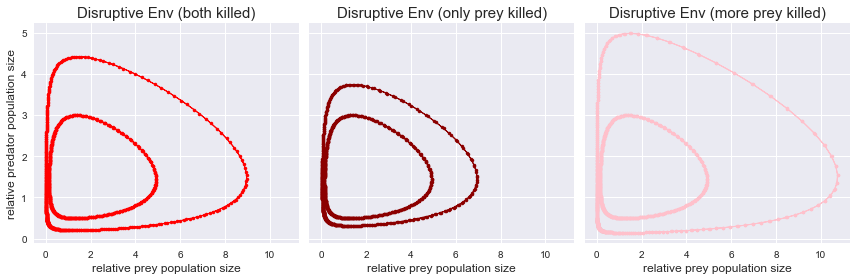

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(12, 4),sharey=True,sharex=True)
ax1, ax2, ax3 = ax.ravel()

#70% prey and predator populations killed off
phase_space_plotting(prey_4, predator_4,'Disruptive Env (both killed)',ax=ax1)

#only 70% prey population killed off
phase_space_plotting(prey_5, predator_5,'Disruptive Env (only prey killed)',ylabel='',color='darkred',ax=ax2)

#90% prey and 70% predator population killed off
phase_space_plotting(prey_6, predator_6,'Disruptive Env (more prey killed)',ylabel='',color='pink',ax=ax3)

plt.tight_layout()
plt.show()

Firstly, let's try to understand the phase space plot when 70% of both prey and predator popualations are killed off with the disruption at t = 50, as represented in the leftmost plot.

The inner phase space plot represents the prey-predator dynamic before the once-off disruption at t=50, while the outer phase space plot represents the prey-predator populations after the disruption. 

The bottom left point (representing the initial prey/predator population sizes) on the outer phase space plot is lower than that of the inner phase plot. This is because the disruption decreases 70% of both the prey and predator populations. The rebound effect would allow the prey population numbers to "escape" the control of the predator numbers, hence, the prey population rapidly increases beyond the maximum population size before the disruption due to reduced predation pressures. This is represented by a larger width of the outer phase space plot that indicates the amplitude of maximum increase in prey population size. The amplitude of predator numbers will also increase slightly than before the disruption since there is more food with the larger prey population size. This is represented by a greater height of the outer phase plot that indicates the amplitude of maximum increase in the predator population size. 


However, we see that the increase in height of the outer plot is less than the increase in width. This is because the growth rate of the predator is often significantly lower than that of the prey. Hence, the increase in maximum population size reached is lower in predators than prey.

What happened when we selectively killed off the prey population, while keeping the predator population intact?

Comparing the leftmost and the middle plot, as we have mentioned previously, the rebound effect is much less when only 70% of the prey population is killed off (middle plot), as compared to when 70% of both prey and predator populations are killed off (leftmost plot). Hence, the amplitude of oscillation after disruption is much lower in the middle plot than the leftmost plot. In the middle plot, this is seen from the smaller width of the outer phase space plot (that represents a smaller maximum amplitude of prey population size) and a smaller height of the outer phase space plot (that represents a smaller maximum amplitude of the predator population size).

What happened when we selectively killed off more prey population (90%) than predator population (70%)?

Comparing the leftmost and the rightmost plot, as we have mentioned previously, the rebound effect is much greater when only 90% of the prey population is killed off (rightmost plot), as compared to when 70% of prey population is killed off (leftmost plot). Hence, the amplitude of oscillation after disruption is much greater in the rightmost plot than the leftmost plot. In the rightmost plot, this is seen from the greater width of the outer phase space plot (that represents a greater maximum amplitude of prey population size) and a greater height of the outer phase space plot (that represents a greater maximum amplitude of the predator population size).

### **Just for Fun: Adding Stochasticity to the Lotka-Volterra Model and Phase Space Plot**

The models that we have been using up to this point are deterministic. However, in nature, there is a unpredictable, complex interplay of a multitude of influences (both biotic and abiotic) that could have minute effects on selection pressure on both the prey and predator, causing random fluctuations in the population numbers over time.

There are many way that we could introduce noise into our model. Here, we have chosen to reflect the noise through a simple uniform distribution with a mean of about zero. 

In this modified model, we will introduce a random stochastic term to the relative population size of both the prey and predator over time, hence, perturbed out of the steady state. However, the overall pattern of population dynamics remains constant.


To begin, we created a function to add stochasticity to a list.

##### Code

In [19]:
import random

In [20]:
def adding_stochasticity(input_list):

  #amp of noise term
  amp = 0.05
  # noise term to perturb differential equations

  output_list=[]
  for i in input_list:
    output_list.append(i+(amp * np.random.rand()))
  
  return output_list

In [21]:
stochastic_prey = adding_stochasticity(prey)
stochastic_predator = adding_stochasticity(predator)

##### Plotting

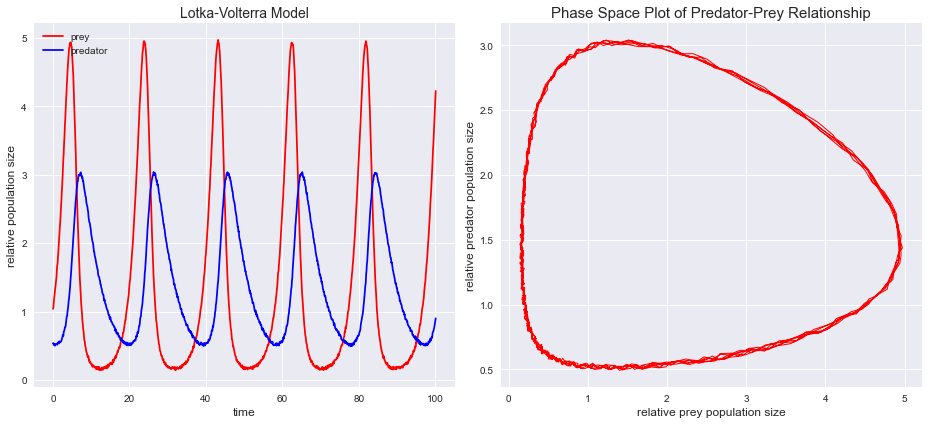

In [22]:
#plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
ax1, ax2 = ax.ravel()

lotka_volterra_plotting(time,stochastic_prey,stochastic_predator,'Lotka-Volterra Model',
                        marker='',ax=ax1)
phase_space_plotting(stochastic_prey,stochastic_predator,
                     'Phase Space Plot of Predator-Prey Relationship',marker='',ax=ax2)

plt.tight_layout()
plt.show()

What we can see is that after adding in all the randomness to our relative population sizes, both the Lotka-Volterra model and phase-space plot experiences random variations over the general trend.

## Conclusion/Discussion

We have seen in our project how powerful models are as tools to visualize complex relationships such as the relationship between predator and prey. In particular, we have seen from our models how our natural biodiversity has a tendency to always achieve a  dynamic equilibrium when it is thrown off-balance. 

From a technical side, the Runge-Kutta Method is more accurate than Euler's method to solve for the initial-value problems of the differential equations as it reduces potential errors between discrete time points. However, as this reduction in error can also be achieved by reducing the `dt` value in our code we chose to adopt a simpler coding approach (aka opting for Euler’s method) to focus more on the scientific content. Moreover, the differential equations from the Lotka-Volterra model are only first order differential equations so using Euler’s method will also be more efficient with less computer time.

## Future work

Currently, our model only makes use of arbitrary values to stimulate the laws of the Lotka-Volterra model through various forms of plot visualisation. In order to put our stimulation to use, we could apply the parameters and real data of specific prey-predators under study.

In reality, the prey-predator relationship is much more complicated, some with 2 or more predators interacting with 2 or more prey in an intricate biodiversity network. For instance, we could use the 3-dimensional Leslie Grower predator-prey model to stimulate the effects of prey defense and mutual interferace of predators [<sup>15</sup>](#fn15). Depending on the specific characteristics of the species and its ecological niche, we could create a unique population dynamic profile of the species in relation to other related species.

Similar stimulation logic (with different equations) could also be applied to other modes of relationship, such as competitive, inter-dependence, interspecific. By combining all these relationships, we can see a better macroscopic view of how all the species in a network are connected.

Progressing further, stochasticity can also be more comprehensively modelled using Brownian motion, or white noise using the Weiner Equation and colored noise using the Levy Equation.

Moreso, recent research has also reveals that the potential dyanamics of a Lotka-Volterrra system may not be stable, and it could either "exhibit the cyclic oscillation or divergent extinction of one species". It is found that considering for other factors in the environment such as a small sporadic immigration into the prey-predator population, and other effects of non-linear interaction term on the system stability [<sup>16</sup>](#fn16).

On a more technical side, another way of approaching the differential equations of the Lotka-Volterra system in Python could be using the function `odeint` from the `scipy.integrate` module. This can effectively produce an array of values for the population of prey and predator at each timestamp by integrating the solution, one step at a time.

The general syntax for odeint():

`y = odeint(model, y0, t)`

The variables in the expression are:

`model` = function name that returns derivative values at requested  𝑦  and  𝑡  values

`y0` = array of initial value(s) of y

`t` = array of  𝑡  values at which  𝑦  is to be computed.

`y` = array of the values of  𝑦(𝑡)  at the time points specified in t.

This is especially important when the differential equations get more complex and extensive that producing functions to produce the resulting series may be inefficient and tedious.

## References

<span id="fn1"> 1.
White, L. A., Forester, J. D., & Craft, M. E. (2018). Dynamic, spatial  models of parasite transmission in wildlife: Their structure, applications and remaining challenges. Journal of Animal Ecology, 87(3), 559–580. https://doi.org/10.1111/1365-2656.12761 </span> 

<span id="fn2"> 2.
Lu, F., Lin, K., & Chorin, A. (2016). Comparison of continuous and discrete-time data-based modeling for hypoelliptic systems. Communications in Applied Mathematics and Computational Science, 11(2), 187–216. https://doi.org/10.2140/camcos.2016.11.187</span>

<span id="fn3"> 3.
Monte, L. (2009). Predicting the effects of ionising radiation on ecosystems by a generic model based on the Lotka–Volterra equations. Journal of Environmental Radioactivity, 100(6), 477–483. https://doi.org/10.1016/j.jenvrad.2009.03.007</span>

<span id="fn4"> 4.
Bomze, I. M. (1983). Lotka-Volterra equation and replicator dynamics: A two-dimensional classification. Biological Cybernetics, 48(3), 201–211. https://doi.org/10.1007/BF00318088</span>

<span id="fn5"> 5.
Křivan, V. (2008). Prey–Predator Models. In S. E. Jørgensen & B. D. Fath (Eds.), Encyclopedia of Ecology (pp. 2929–2940). Academic Press. https://doi.org/10.1016/B978-008045405-4.00676-5</span>

<span id="fn6"> 6.
Din, Q. (2013). Dynamics of a discrete Lotka-Volterra model. Advances in Difference Equations, 2013(1), 95. https://doi.org/10.1186/1687-1847-2013-95</span>

<span id="fn7"> 7.
Barton, J. A., Hutson, K. S., Bourne, D. G., Humphrey, C., Dybala, C., & Rawlinson, K. A. (2019). The Life Cycle of the Acropora Coral-Eating Flatworm (AEFW), Prosthiostomum acroporae; The Influence of Temperature and Management Guidelines. Frontiers in Marine Science, 6. https://www.frontiersin.org/article/10.3389/fmars.2019.00524</span>

<span id="fn8"> 8.
Maiti, A. P., Dubey, B., & Tushar, J. (2017). A delayed prey–predator model with Crowley–Martin-type functional response including prey refuge. Mathematical Methods in the Applied Sciences, 40(16), 5792–5809. https://doi.org/10.1002/mma.4429</span>

<span id="fn9"> 9.
Novak, L., Ambaum, M. H. P., & Tailleux, R. (2017). Marginal stability and predator–prey behaviour within storm tracks. Quarterly Journal of the Royal Meteorological Society, 143(704), 1421–1433. https://doi.org/10.1002/qj.3014</span>

<span id="fn10"> 10.
Hills, A. (2022). Predator-Prey Systems [Jupyter Notebook]. https://github.com/INASIC/predator-prey_systems/blob/eb76ab8ba43271e89d940ee4e511dad0ca99b9d3/Modelling%20Predator-Prey%20Systems%20in%20Python.ipynb (Original work published 2017)</span>

<span id="fn11"> 11.
Lotka-Volterra equations—Scientific Python: A collection of science oriented python examples documentation. (2022). Retrieved 1 April 2022, from https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html</span>

<span id="fn12"> 12.
Lotka-Volterra-Model. (2022). Retrieved 1 April 2022, from https://aubreymoore.github.io/ALBI345F17/pdfs/Lotka-Volterra-Model.html</span>

<span id="fn13"> 13.
Porwal, M., Padalia, H., & Roy, P. (2012). Impact of tsunami on the forest and biodiversity richness in Nicobar Islands (Andaman and Nicobar Islands), India. Biodiversity & Conservation, 21(5), 1267–1287. https://doi.org/10.1007/s10531-011-0214-x</span>

<span id="fn14"> 14.
Patterson, K. L., Porter, J. W., Ritchie, K. B., Polson, S. W., Mueller, E., Peters, E. C., Santavy, D. L., & Smith, G. W. (2002). The etiology of white pox, a lethal disease of the Caribbean elkhorn coral, Acropora palmata. Proceedings of the National Academy of Sciences, 99(13), 8725–8730. https://doi.org/10.1073/pnas.092260099</span>

<span id="fn15"> 15.
Yue, Q. (2016). Dynamics of a modified Leslie–Gower predator–prey model with Holling-type II schemes and a prey refuge. SpringerPlus, 5, 461. https://doi.org/10.1186/s40064-016-2087-7</span>

<span id="fn16"> 16.
Tahara, T., Gavina, M. K. A., Kawano, T., Tubay, J. M., Rabajante, J. F., Ito, H., Morita, S., Ichinose, G., Okabe, T., Togashi, T., Tainaka, K., Shimizu, A., Nagatani, T., & Yoshimura, J. (2018). Asymptotic stability of a modified Lotka-Volterra model with small immigrations. Scientific Reports, 8(1), 7029. https://doi.org/10.1038/s41598-018-25436-2</span>
